In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,NaN,14.14,NaN,2.88,72.61,0.08,NaN,NaN,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	15
float64		column 2	10
float64		column 3	31
float64		column 4	15
float64		column 5	31
float64		column 6	20
float64		column 7	31
float64		column 8	36
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,199.000000,204.000000,183.00000,199.000000,183.000000,194.000000,183.000000,178.000000,214.000000
mean,1.518325,13.381275,2.73000,1.434271,72.623060,0.510206,8.959563,0.174831,0.057009
std,0.003103,0.764157,1.41917,0.493973,0.743928,0.679115,1.436708,0.518760,0.097439
min,1.511150,10.730000,0.00000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516485,12.930000,2.31500,1.190000,72.280000,0.122500,8.225000,0.000000,0.000000
50%,1.517630,13.295000,3.48000,1.360000,72.780000,0.560000,8.590000,0.000000,0.000000
75%,1.519050,13.802500,3.60000,1.620000,73.055000,0.610000,9.140000,0.000000,0.100000
max,1.533930,15.790000,4.49000,3.500000,75.180000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

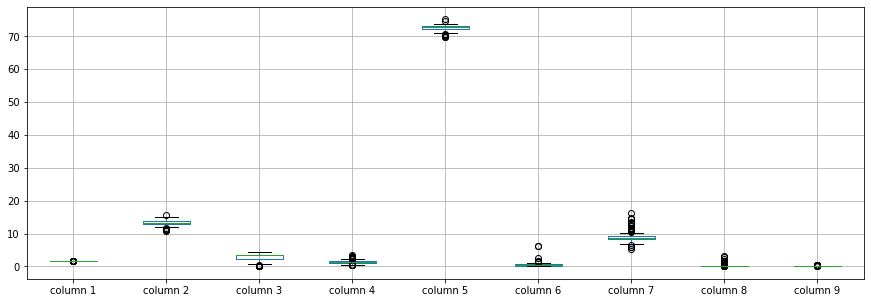

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518325
column 2    13.381275
column 3     2.730000
column 4     1.434271
column 5    72.623060
column 6     0.510206
column 7     8.959563
column 8     0.174831
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.150062,-0.123123,-0.387715,-0.527552,-0.313273,0.819200,0.038714,0.150552
column 2,-0.150062,1.000000,-0.227298,0.178315,-0.146954,-0.250174,-0.240572,0.335860,-0.244682
column 3,-0.123123,-0.227298,1.000000,-0.465975,-0.072919,-0.045041,-0.437099,-0.482419,0.028509
column 4,-0.387715,0.178315,-0.465975,1.000000,0.022300,0.367544,-0.280282,0.462371,-0.067768
column 5,-0.527552,-0.146954,-0.072919,0.022300,1.000000,-0.185892,-0.211766,-0.161262,-0.041960
column 6,-0.313273,-0.250174,-0.045041,0.367544,-0.185892,1.000000,-0.321059,-0.006469,-0.026028
column 7,0.819200,-0.240572,-0.437099,-0.280282,-0.211766,-0.321059,1.000000,-0.114234,0.149901
column 8,0.038714,0.335860,-0.482419,0.462371,-0.161262,-0.006469,-0.114234,1.000000,-0.031883
column 9,0.150552,-0.244682,0.028509,-0.067768,-0.041960,-0.026028,0.149901,-0.031883,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+65,9+65+65,9+65+65+65,9+65+65+65+65,9+65+65+65+65+65,9+65+65+65+65+65+65,9+65+65+65+65+65,9+65+65+65+65,9+65+65+65,9+65+65,9+65,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=70)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 88.88289935772235
Epoch: 1 , loss: 88.87491372915414
Epoch: 2 , loss: 89.23067298302284
Epoch: 3 , loss: 89.20335446871243
Epoch: 4 , loss: 89.51616903451773
Epoch: 5 , loss: 89.14184218186598
Epoch: 6 , loss: 88.70299530029297
Epoch: 7 , loss: 88.66158470740685
Epoch: 8 , loss: 88.72657423753004
Epoch: 9 , loss: 89.80435063288762
Epoch: 10 , loss: 88.4157937856821
Epoch: 11 , loss: 88.68229147104117
Epoch: 12 , loss: 88.64785062349759
Epoch: 13 , loss: 88.59424297626202
Epoch: 14 , loss: 87.45642500657301
Epoch: 15 , loss: 87.06361271784856
Epoch: 16 , loss: 87.23545309213492
Epoch: 17 , loss: 86.92282221867488
Epoch: 18 , loss: 86.49401033841647
Epoch: 19 , loss: 86.2045170710637
Epoch: 20 , loss: 86.3121819129357
Epoch: 21 , loss: 86.31041658841647
Epoch: 22 , loss: 85.82529742901141
Epoch: 23 , loss: 84.33784015362079
Epoch: 24 , loss: 83.6207768366887
Epoch: 25 , loss: 82.4242424598107
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.353624,0.0,3.693674,0.0,0.0,0.000000,3.655933,-0.814288,0.0
210,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
211,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
212,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(239.71964329996706, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.2198383466314296

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     3.650000
column 4     1.216141
column 5    50.024727
column 6     0.190000
column 7     8.718784
column 8     0.146161
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,13.64,4.490000,1.10,71.78,0.060000,8.750000,0.000000,0.0
1,1.517610,13.89,3.600000,1.36,72.73,0.480000,7.830000,0.000000,0.0
2,1.516180,13.53,3.550000,1.54,72.99,0.390000,7.780000,0.000000,0.0
3,1.517660,13.21,3.690000,1.29,72.61,0.570000,8.220000,0.000000,0.0
4,1.517420,13.27,3.620000,1.24,73.08,0.550000,8.070000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.869854,14.14,3.693674,2.88,72.61,0.080000,12.835933,0.245712,0.0
210,1.516850,14.92,0.000000,1.99,73.06,0.000000,8.400000,1.590000,0.0
211,1.520650,14.36,0.000000,2.02,73.42,0.000000,8.440000,1.640000,0.0
212,1.516510,14.38,0.000000,1.94,73.61,0.000000,8.480000,1.570000,0.0


In [20]:
imputations[-1].to_excel("Glass_AE_10(imp).xlsx", index=False, header=False)